# Digit Recognizer Modified

## Importing, Data Processing, Visualization


### Suggestions from ChatGPT
- Experiment with model variations
- Improve performance
- Handle imbalanced data

### Import necessary libraries

We first have to start by importing libraries. We will use numpy, pandas, tensorflow, pyplot, keras and sklearn for various tasks.

In [5]:
# importing numpy
import numpy as np
np.random.seed(123)

In [6]:
# importing tensorflow
import tensorflow as tf
tf.random.set_seed(123)

In [7]:
# importing pandas
import pandas as pd

In [8]:
# importing matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# importing keras
from tensorflow import keras
from keras import backend as K

In [10]:
# importing sklearn
import sklearn

### Load the MNIST Dataset

First, we have to load the training dataset

In [11]:
X = pd.read_csv('train.csv')
X

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Splitting, Data Exploration and Visualization

In [2]:
from sklearn.model_selection import train_test_split

In [13]:
# Splitting into train and test sets
(X_train, X_test, y_train, y_test) = train_test_split(
    X.drop('label', axis=1),
    X['label'],
    test_size=0.2,
    random_state=123
    )

display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(33600, 784)

(8400, 784)

(33600,)

(8400,)

In [26]:
# num_labels is the size of the output layer
num_labels = len(y_train.unique())
num_labels

10

We can visualize a subset of images just to make sure we understand what we are working with.

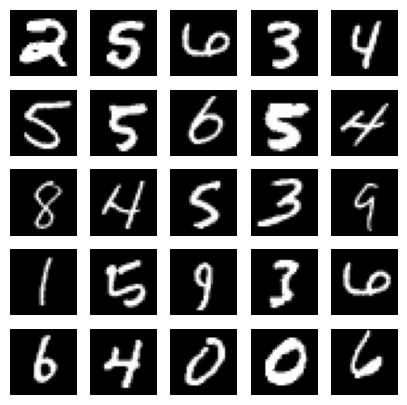

In [199]:
# Visualization
indexes = np.random.randint(0, X_train.shape[0], 25)
images = X_train.iloc[indexes]
labels = y_train.iloc[indexes]

# Plotting
plt.figure(figsize=(5, 5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    plt.imshow(images.iloc[i].values.reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.show()

### Data Preprocessing

We need to scale the data to be between 0 and 1 and also convert the data from integer to float

In [16]:
# Scale the data
X_train_ = X_train / 255.0
X_test_ = X_test / 255.0
type(X_train_)

pandas.core.frame.DataFrame

### Rotating the images

This process is entirely unnecessary, but may help the model because the images have been rotated by 10 degrees

In [21]:
from PIL import Image

In [22]:
def rotate_image(X, degree):
    for i in range(10):   # 1000 is the number of images to rotate
        img = Image.fromarray(X.iloc[i].values.reshape(28, 28))
        rotated_img = img.rotate(degree)
        rotated_df = pd.DataFrame(np.array(rotated_img).reshape(1, 784))
        rotated_df.columns = X.columns
        X = pd.concat([X, rotated_df], ignore_index=True)
        # y = pd.concat([y, pd.Series(y[i])], ignore_index=True)
        if i % 100 == 0: print(i)
    return X


In [23]:
X_train_ = rotate_image(X_train_, 10)
type(X_train_) # Make sure this has more images than the original X_train

0


pandas.core.frame.DataFrame

In [204]:
# Adding labels of the rotated images
y_train = pd.concat([y_train, y_train[:200]], ignore_index=True)
assert len(y_train) == len(X_train_) # Make sure these are equal

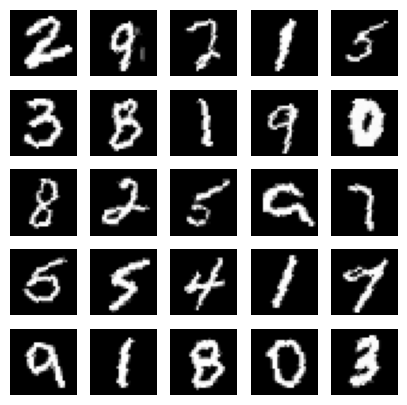

In [205]:
# Visualization (should look a little rotated)
plt.figure(figsize=(5, 5))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train_.iloc[33600+i].values.reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.show()

### Oversampling 7, 2, 9, 4

In [221]:
# Gather indexes of 7, 2, 4, 9
indexes_7 = y_train[y_train == 7].index
indexes_2 = y_train[y_train == 2].index
indexes_4 = y_train[y_train == 4].index
indexes_9 = y_train[y_train == 9].index

In [230]:
# Reducing the number of indexes
np.random.seed(123)
indexes_7_reduced = np.random.choice(indexes_7, 50, replace=False)
indexes_2_reduced = np.random.choice(indexes_2, 50, replace=False)
indexes_4_reduced = np.random.choice(indexes_4, 50, replace=False)
indexes_9_reduced = np.random.choice(indexes_9, 50, replace=False)

In [231]:
oversample_indexes = np.concatenate([indexes_7_reduced, indexes_2_reduced, indexes_4_reduced, indexes_9_reduced])
X_train_ = pd.concat([X_train_, X_train_.iloc[oversample_indexes]])

In [234]:
y_train = pd.concat([y_train, y_train.iloc[oversample_indexes]])

In [235]:
y_train.shape

(34000,)

### Encoding and Importing

In [27]:
# Encoding both the training and testing labels into one-hot vectors
y_train_enc = keras.utils.to_categorical(y_train, num_labels)
y_test_enc = keras.utils.to_categorical(y_test, num_labels)

In [24]:
# importing some additional model packages
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Conv2D, Input, Reshape, Flatten

## Model 1

### Model 1 - Setup

In this section, we will set up the deep neural network

In [28]:
# Network parameters
batch_size = 28

In [29]:
# Initializing the model
# We will start with a deep neural network with one convolutional layer as the input
# layer, followed by 3 dense layers
model = Sequential([
keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)), # Convolutional layer
keras.layers.Flatten(), # Flatten layer
keras.layers.Dense(256, activation='relu'), # Dense layer
keras.layers.Dense(128, activation='relu'), # Dense layer
keras.layers.Dense(num_labels, activation='softmax') # Output layer, this must be the same size as the number of labels
])

c:\Users\buran\OneDrive\Desktop\Programs\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [158]:
# Look at the model
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │     5,538,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,572,554 (21.26 MB)

 Trainable params: 5,572,554 (21.26 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

### Model 1 - Training

This section is where we will train the model

In [33]:
# Reshape the data to match the input shape of the model
# we have to do this step because the model expects a 3D input
X_train_reshaped = X_train_.values.reshape(-1, 28, 28, 1)
X_test_reshaped = X_test_.values.reshape(-1, 28, 28, 1)
type(X_train_)

numpy.ndarray

In [188]:
# Ensure the model is compiled only once
if not model.built:
    model.build(input_shape=(None, 28, 28, 1))

# We will fit the model and store the iterations in the 'history' variable
history = model.fit(
    X_train_reshaped,
    y_train_enc,
    epochs=10,
    batch_size=batch_size,
    validation_split=0.1
)

Epoch 1/10
 111/1087 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 1.0000 - loss: 8.1953e-04

KeyboardInterrupt: 

### Model 1 - Evaluation

In [162]:
# After the model has been trained, we can evaluate its performance on the training data
# we expect it to be very high since it has learned the noise in the training data
train_loss, train_acc = model.evaluate(X_train_reshaped, y_train_enc, batch_size=batch_size)
print('\nTrain accuracy:', round(train_acc, 3))
print('\nTrain loss:', round(train_loss, 3))

# We can also evaluate the model on unseen data and determine its performance here.
# We expect this to be lower since the model has never seen this data before.
test_loss, test_acc = model.evaluate(X_test_reshaped, y_test_enc, batch_size=batch_size)
print('\nTest accuracy:', round(test_acc, 3))
print('\nTest loss:', round(test_loss, 3))

1208/1208 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9997 - loss: 0.0013

Train accuracy: 0.998

Train loss: 0.011
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9829 - loss: 0.0990

Test accuracy: 0.983

Test loss: 0.095


In [164]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


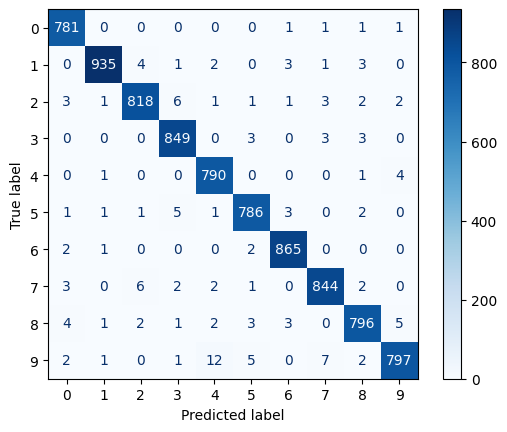

In [165]:
# We can evaluate visually which digits the model is struggling with most
y_pred = model.predict(X_test_reshaped) # Make predictions
y_pred_categorical = np.argmax(y_pred, axis=1) # Grab the label of the highest probability
y_test_categorical = np.argmax(y_test_enc, axis=1) # Grab the label of the highest probability

cm = confusion_matrix(y_test_categorical, y_pred_categorical)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=np.unique(y_test_categorical))
disp.plot(cmap='Blues')
plt.show()

## Model 2

### Model 2 - Setup

In [208]:
model2 = Sequential([
keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
keras.layers.MaxPooling2D(pool_size=(2, 2)), # Pooling layer
keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),# Convolutional layer
keras.layers.Flatten(), # Flatten layer
keras.layers.Dense(256, activation='relu'), # Dense layer
keras.layers.Dense(128, activation='relu'), # Dense layer
keras.layers.Dense(num_labels, activation='softmax') # Output layer
])

c:\Users\buran\OneDrive\Desktop\Programs\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [209]:
model2.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 7744)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │     1,982,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,035,722 (7.77 MB)

 Trainable params: 2,035,722 (7.77 MB)

 Non-trainable params: 0 (0.00 B)

In [210]:
opt = keras.optimizers.Adam(learning_rate=0.0001)
model2.compile(
    optimizer=opt,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

### Model 2 - Training

In [236]:
history2 = model2.fit(
    X_train_reshaped,
    y_train_enc,
    epochs=10,
    batch_size=batch_size,
    validation_split=0.1
)

Epoch 1/10
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.9973 - loss: 0.0099 - val_accuracy: 0.9843 - val_loss: 0.0556
Epoch 2/10
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.9986 - loss: 0.0073 - val_accuracy: 0.9867 - val_loss: 0.0532
Epoch 3/10
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.9979 - loss: 0.0079 - val_accuracy: 0.9867 - val_loss: 0.0550
Epoch 4/10
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.9983 - loss: 0.0066 - val_accuracy: 0.9858 - val_loss: 0.0635
Epoch 5/10
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.9986 - loss: 0.0057 - val_accuracy: 0.9834 - val_loss: 0.0668
Epoch 6/10
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.9984 - loss: 0.0059 - val_accuracy: 0.9852 - val_loss: 0.0648
Epoch 7/10
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.9987 - loss: 0.0048 - val_accuracy: 0.9831 - val_loss: 0.0680
Epoch 8/10
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.9991 -

### Model 2 - Evaluation

In [237]:
# After the model has been trained, we can evaluate its performance on the training data
# we expect it to be very high since it has learned the noise in the training data
train_loss, train_acc = model2.evaluate(X_train_reshaped, y_train_enc, batch_size=batch_size)
print('\nTrain accuracy:', round(train_acc, 3))
print('\nTrain loss:', round(train_loss, 3))

# We can also evaluate the model on unseen data and determine its performance here.
# We expect this to be lower since the model has never seen this data before.
test_loss, test_acc = model2.evaluate(X_test_reshaped, y_test_enc, batch_size=batch_size)
print('\nTest accuracy:', round(test_acc, 3))
print('\nTest loss:', round(test_loss, 3))

1208/1208 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9997 - loss: 0.0018

Train accuracy: 0.998

Train loss: 0.008
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9882 - loss: 0.0471

Test accuracy: 0.988

Test loss: 0.053


263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


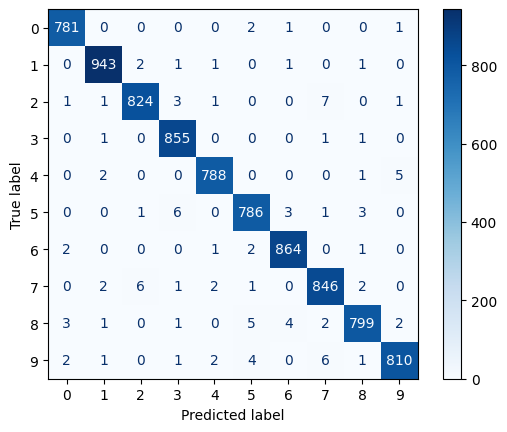

In [238]:
# Make predictions
y_pred_2 = model2.predict(X_test_reshaped)
y_pred_categorical2 = np.argmax(y_pred_2, axis=1)
y_test_categorical = np.argmax(y_test_enc, axis=1)

cm = confusion_matrix(y_test_categorical, y_pred_categorical2)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=np.unique(y_test_categorical))
disp.plot(cmap='Blues')
plt.show()

## Submission

In [239]:
## Create a submission file
submission_input = pd.read_csv('test.csv')
submission_input.describe()
# Preprocess input data by normalizing
submission_input_ = submission_input / 255.0
submission_input_.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000646,0.000287,0.000110,0.000044,0.000026,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.021464,0.014184,0.007112,0.004726,0.003167,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.992157,0.996078,0.756863,0.733333,0.466667,0.0,0.0,0.0,0.0,0.0


In [240]:
submission_input_ = submission_input_.values.reshape(-1, 28, 28, 1)
submission_input_

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [241]:
submission = model2.predict(submission_input_)
submission_labels = np.argmax(submission, axis=1)
submission_labels
submission = pd.DataFrame({'ImageId': range(1, len(submission_labels) + 1), 'Label': submission_labels}, index=None)
submission.head()

875/875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [242]:
submission.to_csv('submission.csv', index=False)